<a href="https://colab.research.google.com/github/Rajat-Kumar-Pandey/MACHINE-LEARNING/blob/main/Revisiting_sleep_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Dataset path
DATASET_PATH = "/content/drive/MyDrive/Drowssinness data/Resized_Driver_Drowsiness_Dataset"
CHUNK_PATH = "/content/drive/MyDrive/Drowsiness_Data/Chunks"

In [ ]:
!ls "/content/drive/MyDrive/"
!ls "/content/drive/MyDrive/Drowssinness data"


'Colab Notebooks'     ff_drowsy       Resized_Driver_Drowsiness_Dataset.rar
'Drowssinness data'   ff_non_drowsy
drowsy	non_drowsy  Resized_Driver_Drowsiness_Dataset


In [ ]:
# Define class folders
classes = ['non_drowsy', 'drowsy']
image_counts = {}

In [ ]:


if os.path.exists(DATASET_PATH):
    print("Dataset folder found!")
else:
    print("❌ Dataset folder NOT found. Check the path.")


Dataset folder found!


In [ ]:
# Count images in each folder
for cls in classes:
    folder_path = os.path.join(DATASET_PATH, cls)
    image_counts[cls] = len(os.listdir(folder_path))

In [ ]:

# Print image counts
print("Dataset Summary:")
for cls, count in image_counts.items():
    print(f"{cls}: {count} images")


Dataset Summary:
non_drowsy: 23829 images
drowsy: 26494 images


In [ ]:

# Function to load and display random images
def plot_sample_images(dataset_path, classes, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))

    for i in range(num_samples):
        cls = random.choice(classes)
        folder_path = os.path.join(dataset_path, cls)
        img_name = random.choice(os.listdir(folder_path))
        img_path = os.path.join(folder_path, img_name)

        # Load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Plot image
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(cls)

    plt.show()

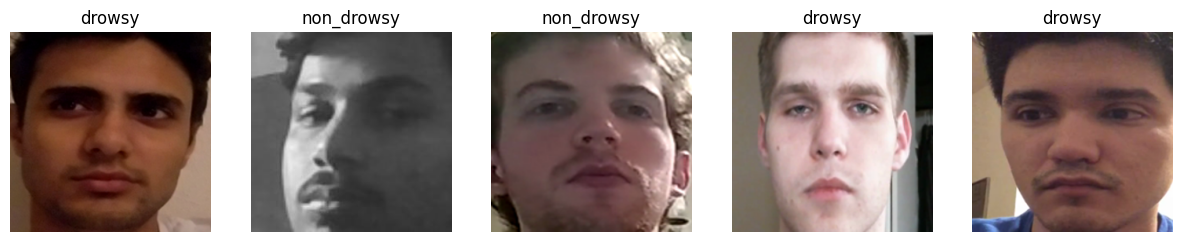

In [ ]:
# Plot sample images
plot_sample_images(DATASET_PATH, classes)

In [ ]:
# Number of Chunks
NUM_CHUNKS = 5

# Create Chunk Folders
for i in range(1, NUM_CHUNKS + 1):
    for cls in ['non_drowsy', 'drowsy']:
        os.makedirs(os.path.join(CHUNK_PATH, f'chunk_{i}', cls), exist_ok=True)

print("Chunk folders created!")

Chunk folders created!


📌 Step 2: Split Images Randomly
Now, let's divide the dataset into 5 equal parts.

In [ ]:
import shutil
# Get image lists
non_drowsy_images = os.listdir(os.path.join(DATASET_PATH, 'non_drowsy'))
drowsy_images = os.listdir(os.path.join(DATASET_PATH, 'drowsy'))

# Shuffle to ensure randomness
random.shuffle(non_drowsy_images)
random.shuffle(drowsy_images)

# Split into 5 chunks
chunk_size_non_drowsy = len(non_drowsy_images) // NUM_CHUNKS
chunk_size_drowsy = len(drowsy_images) // NUM_CHUNKS

# Move images into respective chunks
for i in range(NUM_CHUNKS):
    chunk_folder = os.path.join(CHUNK_PATH, f'chunk_{i+1}')

    # Move non_drowsy images
    for img in non_drowsy_images[i * chunk_size_non_drowsy : (i + 1) * chunk_size_non_drowsy]:
        shutil.move(os.path.join(DATASET_PATH, 'non_drowsy', img), os.path.join(chunk_folder, 'non_drowsy', img))

    # Move drowsy images
    for img in drowsy_images[i * chunk_size_drowsy : (i + 1) * chunk_size_drowsy]:
        shutil.move(os.path.join(DATASET_PATH, 'drowsy', img), os.path.join(chunk_folder, 'drowsy', img))

print("Data successfully divided into 5 chunks!")


Data successfully divided into 5 chunks!


In [ ]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Augmentation settings
datagen = ImageDataGenerator(
    brightness_range=(0.7, 1.3),
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    rescale=1/255
)

In [ ]:
# Create augmented image folders inside each chunk
for i in range(1, NUM_CHUNKS + 1):
    for cls in ['non_drowsy', 'drowsy']:
        aug_path = os.path.join(CHUNK_PATH, f'chunk_{i}', 'augmented', cls)
        os.makedirs(aug_path, exist_ok=True)

print("Augmented directories created inside each chunk!")


Augmented directories created inside each chunk!


In [ ]:
# Function to apply augmentation and save images
def augment_chunk_images(chunk_folder, num_augmented=3):
    for cls in ['non_drowsy', 'drowsy']:
        input_folder = os.path.join(chunk_folder, cls)
        output_folder = os.path.join(chunk_folder, 'augmented', cls)

        if not os.path.exists(input_folder):
            print(f"Skipping missing folder: {input_folder}")
            continue

        images = os.listdir(input_folder)

        for img_name in tqdm(images, desc=f"Augmenting {cls} in {chunk_folder}"):
            img_path = os.path.join(input_folder, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = np.expand_dims(img, axis=0)

            save_prefix = os.path.splitext(img_name)[0]

            i = 0
            for batch in datagen.flow(img, batch_size=1, save_to_dir=output_folder, save_prefix=save_prefix, save_format='png'):
                i += 1
                if i >= num_augmented:
                    break

In [ ]:
# Apply augmentation to all chunks
for i in range(1, NUM_CHUNKS + 1):
    chunk_folder = os.path.join(CHUNK_PATH, f'chunk_{i}')
    augment_chunk_images(chunk_folder)

print("Data augmentation completed for all chunks!")

Augmenting non_drowsy in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_1: 100%|██████████| 4765/4765 [14:45<00:00,  5.38it/s]
Augmenting drowsy in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_1: 100%|██████████| 5298/5298 [17:28<00:00,  5.05it/s]
Augmenting non_drowsy in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_2: 100%|██████████| 4765/4765 [15:27<00:00,  5.14it/s]
Augmenting drowsy in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_2: 100%|██████████| 5298/5298 [16:48<00:00,  5.25it/s]
Augmenting non_drowsy in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_3: 100%|██████████| 4765/4765 [14:44<00:00,  5.39it/s]
Augmenting drowsy in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_3: 100%|██████████| 5298/5298 [17:01<00:00,  5.19it/s]
Augmenting non_drowsy in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_4: 100%|██████████| 4765/4765 [14:27<00:00,  5.49it/s]
Augmenting drowsy in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_4: 100%|███████

Data augmentation completed for all chunks!


In [ ]:
import os

# Define Chunks Path
CHUNK_PATH = "/content/drive/MyDrive/Drowsiness_Data/Chunks"

# Function to get folder size in MB
def get_folder_size(folder_path):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            total_size += os.path.getsize(file_path)
    return total_size / (1024 * 1024)  # Convert to MB

# Function to count number of images in a folder
def count_images(folder_path):
    return len([file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))])

# Loop through all chunks and calculate size and count
for i in range(1, 6):  # Loop from chunk_1 to chunk_5
    chunk_folder = os.path.join(CHUNK_PATH, f'chunk_{i}', 'augmented')

    drowsy_folder = os.path.join(chunk_folder, "drowsy")
    non_drowsy_folder = os.path.join(chunk_folder, "non_drowsy")

    if os.path.exists(drowsy_folder) and os.path.exists(non_drowsy_folder):
        drowsy_size = get_folder_size(drowsy_folder)
        non_drowsy_size = get_folder_size(non_drowsy_folder)

        drowsy_count = count_images(drowsy_folder)
        non_drowsy_count = count_images(non_drowsy_folder)

        print(f"📂 **Chunk {i}**")
        print(f"   📌 Drowsy - {drowsy_count} images | {drowsy_size:.2f} MB")
        print(f"   📌 Non-Drowsy - {non_drowsy_count} images | {non_drowsy_size:.2f} MB")
        print("=" * 50)
    else:
        print(f"🚨 Chunk {i} does not contain augmented folders correctly!")



📂 **Chunk 1**
   📌 Drowsy - 15892 images | 1000.32 MB
   📌 Non-Drowsy - 14294 images | 901.40 MB
📂 **Chunk 2**
   📌 Drowsy - 15892 images | 999.77 MB
   📌 Non-Drowsy - 14294 images | 902.26 MB
📂 **Chunk 3**
   📌 Drowsy - 15893 images | 999.72 MB
   📌 Non-Drowsy - 14292 images | 895.83 MB
📂 **Chunk 4**
   📌 Drowsy - 15892 images | 994.54 MB
   📌 Non-Drowsy - 14295 images | 897.47 MB
📂 **Chunk 5**
   📌 Drowsy - 1735 images | 114.53 MB
   📌 Non-Drowsy - 14292 images | 898.96 MB


In [ ]:
import os
import random

# Define paths
CHUNK_PATH = "/content/drive/MyDrive/Drowsiness_Data/Chunks"

# Split function
def split_data(image_list, train_ratio=0.7):
    total = len(image_list)
    train_count = int(total * train_ratio)
    val_count = (total - train_count) // 2  # Half of remaining for validation
    test_count = total - train_count - val_count  # Remaining for test

    train_images = image_list[:train_count]
    val_images = image_list[train_count:train_count + val_count]
    test_images = image_list[train_count + val_count:]

    return train_images, val_images, test_images

# Loop through all chunks
for chunk_num in range(1, 6):
    chunk_path = os.path.join(CHUNK_PATH, f"chunk_{chunk_num}", "augmented")

    # Get image lists from augmented folders
    drowsy_path = os.path.join(chunk_path, "drowsy")
    non_drowsy_path = os.path.join(chunk_path, "non_drowsy")

    drowsy_images = os.listdir(drowsy_path) if os.path.exists(drowsy_path) else []
    non_drowsy_images = os.listdir(non_drowsy_path) if os.path.exists(non_drowsy_path) else []

    # Shuffle for randomness
    random.shuffle(drowsy_images)
    random.shuffle(non_drowsy_images)

    # Split Drowsy images
    train_drowsy, val_drowsy, test_drowsy = split_data(drowsy_images)

    # Split Non-Drowsy images
    train_non_drowsy, val_non_drowsy, test_non_drowsy = split_data(non_drowsy_images)

    # Print dataset distribution for each chunk
    print(f"\n📌 **Chunk {chunk_num} Data Split**")
    print(f"🔹 Drowsy - Total: {len(drowsy_images)} | Train: {len(train_drowsy)} | Val: {len(val_drowsy)} | Test: {len(test_drowsy)}")
    print(f"🔹 Non-Drowsy - Total: {len(non_drowsy_images)} | Train: {len(train_non_drowsy)} | Val: {len(val_non_drowsy)} | Test: {len(test_non_drowsy)}")



📌 **Chunk 1 Data Split**
🔹 Drowsy - Total: 15892 | Train: 11124 | Val: 2384 | Test: 2384
🔹 Non-Drowsy - Total: 14294 | Train: 10005 | Val: 2144 | Test: 2145

📌 **Chunk 2 Data Split**
🔹 Drowsy - Total: 15892 | Train: 11124 | Val: 2384 | Test: 2384
🔹 Non-Drowsy - Total: 14294 | Train: 10005 | Val: 2144 | Test: 2145

📌 **Chunk 3 Data Split**
🔹 Drowsy - Total: 15893 | Train: 11125 | Val: 2384 | Test: 2384
🔹 Non-Drowsy - Total: 14292 | Train: 10004 | Val: 2144 | Test: 2144

📌 **Chunk 4 Data Split**
🔹 Drowsy - Total: 15892 | Train: 11124 | Val: 2384 | Test: 2384
🔹 Non-Drowsy - Total: 14295 | Train: 10006 | Val: 2144 | Test: 2145

📌 **Chunk 5 Data Split**
🔹 Drowsy - Total: 1735 | Train: 1214 | Val: 260 | Test: 261
🔹 Non-Drowsy - Total: 14292 | Train: 10004 | Val: 2144 | Test: 2144


In [ ]:
import os
import cv2
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
CHUNK_PATH = "/content/drive/MyDrive/Drowsiness_Data/Chunks"
AUGMENTED_PATH = "augmented"  # Inside each chunk
IMG_SIZE = (256, 256)  # Resize images for consistency

# Image Preprocessing Function
def preprocess_image(image_path):
    """Preprocesses an image: Resize, Denoise, Enhance Contrast, Normalize."""
    img = cv2.imread(image_path)
    if img is None:  # Handle unreadable images
        print(f"Warning: Unable to read {image_path}")
        return None
    img = cv2.resize(img, IMG_SIZE)

    # Convert to grayscale (optional for better feature extraction)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply CLAHE for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    gray = clahe.apply(gray)

    # Apply Gaussian Blur to reduce noise
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Normalize to range [0,1]
    gray = gray / 255.0

    return gray

# Data Augmentation Setup (Only for Training Data)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    rescale=1./255
)

# Process images in all chunks
for chunk_id in range(3, 6):
    chunk_folder = os.path.join(CHUNK_PATH, f"chunk_{chunk_id}", AUGMENTED_PATH)

    for category in ["drowsy", "non_drowsy"]:
        category_path = os.path.join(chunk_folder, category)
        images = os.listdir(category_path)

        print(f"Processing {category} images in {chunk_folder}...")

        for img_name in images:
            img_path = os.path.join(category_path, img_name)
            preprocessed_img = preprocess_image(img_path)

            # Save the preprocessed image
            if preprocessed_img is not None:  # Only save if processing was successful
                cv2.imwrite(img_path, (preprocessed_img * 255).astype(np.uint8))
            else:
                print(f"Skipping {img_path} due to preprocessing failure.")

print("✅ Image Preprocessing Complete!")


Processing drowsy images in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_3/augmented...
Skipping /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_3/augmented/drowsy/X0872_0_4041.png due to preprocessing failure.
Skipping /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_3/augmented/drowsy/X1375_0_2872.png due to preprocessing failure.
Processing non_drowsy images in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_3/augmented...
Processing drowsy images in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_4/augmented...
Processing non_drowsy images in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_4/augmented...
Processing drowsy images in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_5/augmented...
Processing non_drowsy images in /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_5/augmented...
✅ Image Preprocessing Complete!


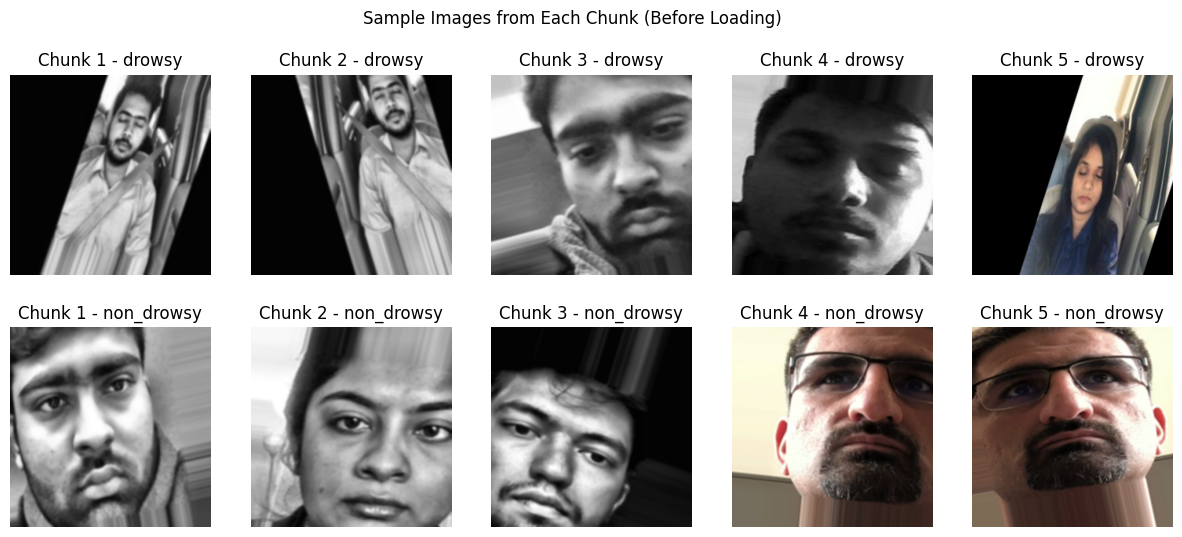

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define Constants
CHUNK_PATH = "/content/drive/MyDrive/Drowsiness_Data/Chunks"
IMG_SIZE = (256, 256)  # Image size
BATCH_SIZE = 32  # Batch size for training
TRAIN_SPLIT = 0.7  # 70% Train, 15% Validation, 15% Test

# Function to Load and Display Sample Images
def show_sample_images():
    """Displays one sample image from each chunk for both classes."""
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    categories = ["drowsy", "non_drowsy"]

    for chunk_id in range(1, 6):  # Iterate through chunks
        for i, category in enumerate(categories):
            chunk_folder = os.path.join(CHUNK_PATH, f"chunk_{chunk_id}", "augmented", category)
            image_files = os.listdir(chunk_folder)

            if image_files:
                img_path = os.path.join(chunk_folder, image_files[0])
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                axes[i, chunk_id - 1].imshow(img)
                axes[i, chunk_id - 1].set_title(f"Chunk {chunk_id} - {category}")
                axes[i, chunk_id - 1].axis("off")

    plt.suptitle("Sample Images from Each Chunk (Before Loading)")
    plt.show()

# Call function to display images before loading
show_sample_images()


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

# Define Constants
CHUNK_PATH = "/content/drive/MyDrive/Drowsiness_Data/Chunks"
IMG_SIZE = (224, 224)  # Target image size
BATCH_SIZE = 32  # Batch size
TRAIN_SPLIT = 0.7  # 70% Train, 15% Validation, 15% Test
AUTOTUNE = tf.data.experimental.AUTOTUNE  # Optimize with multi-threading

# Function to Load and Preprocess Image Efficiently
def load_image(img_path, label):
    """Loads and preprocesses an image using TensorFlow operations."""
    img = tf.io.read_file(img_path)
    img = tf.image.decode_png(img, channels=3)  # Decode PNG image
    img = tf.image.resize(img, IMG_SIZE)  # Resize
    img = img / 255.0  # Normalize to [0,1]
    return img, label

# Function to Load Data from All Chunks and Print Stats
def load_data_from_chunks():
    """Dynamically loads images from all chunks using TensorFlow Dataset API with dataset statistics."""
    train_images, train_labels = [], []
    val_images, val_labels = [], []
    test_images, test_labels = [], []
    total_drowsy, total_non_drowsy = 0, 0

    for chunk_id in range(1, 6):  # Iterate through chunks
        chunk_folder = os.path.join(CHUNK_PATH, f"chunk_{chunk_id}", "augmented")
        print(f"\n📌 Loading data from {chunk_folder}...")

        for category in ["drowsy", "non_drowsy"]:
            category_path = os.path.join(chunk_folder, category)
            images = [os.path.join(category_path, img) for img in os.listdir(category_path)]
            np.random.shuffle(images)  # Shuffle images

            total_images = len(images)
            train_size = int(total_images * TRAIN_SPLIT)
            val_size = (total_images - train_size) // 2
            test_size = total_images - train_size - val_size
            label = 0 if category == "drowsy" else 1  # Assign labels

            # Count for stats
            if category == "drowsy":
                total_drowsy += total_images
            else:
                total_non_drowsy += total_images

            # Assign to respective sets
            train_images.extend(images[:train_size])
            train_labels.extend([label] * train_size)
            val_images.extend(images[train_size:train_size + val_size])
            val_labels.extend([label] * val_size)
            test_images.extend(images[train_size + val_size:])
            test_labels.extend([label] * test_size)

            print(f"   ✅ {category.capitalize()} Images: Total={total_images}, Train={train_size}, Val={val_size}, Test={test_size}")

    # Print final dataset distribution
    total_images = total_drowsy + total_non_drowsy
    print(f"\n📊 **Dataset Summary:**")
    print(f"   🔹 Total Images: {total_images}")
    print(f"   🔹 Drowsy Images: {total_drowsy} ({(total_drowsy / total_images) * 100:.2f}%)")
    print(f"   🔹 Non-Drowsy Images: {total_non_drowsy} ({(total_non_drowsy / total_images) * 100:.2f}%)")

    # Convert to TensorFlow Datasets
    train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
    val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
    test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

    # Apply mapping and optimizations
    train_ds = (train_ds
                .map(load_image, num_parallel_calls=AUTOTUNE)
                .shuffle(10000)
                .batch(BATCH_SIZE)
                .prefetch(AUTOTUNE))

    val_ds = (val_ds
              .map(load_image, num_parallel_calls=AUTOTUNE)
              .batch(BATCH_SIZE)
              .prefetch(AUTOTUNE))

    test_ds = (test_ds
               .map(load_image, num_parallel_calls=AUTOTUNE)
               .batch(BATCH_SIZE)
               .prefetch(AUTOTUNE))

    return train_ds, val_ds, test_ds

# Load Data using Optimized Pipeline
train_ds, val_ds, test_ds = load_data_from_chunks()

# Verify Dataset Structure
print(f"\n✅ **Final Dataset Overview:**")
print(f"   🔹 Train dataset: {train_ds}")
print(f"   🔹 Validation dataset: {val_ds}")
print(f"   🔹 Test dataset: {test_ds}")



📌 Loading data from /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_1/augmented...
   ✅ Drowsy Images: Total=15892, Train=11124, Val=2384, Test=2384
   ✅ Non_drowsy Images: Total=14294, Train=10005, Val=2144, Test=2145

📌 Loading data from /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_2/augmented...
   ✅ Drowsy Images: Total=15892, Train=11124, Val=2384, Test=2384
   ✅ Non_drowsy Images: Total=14294, Train=10005, Val=2144, Test=2145

📌 Loading data from /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_3/augmented...
   ✅ Drowsy Images: Total=15893, Train=11125, Val=2384, Test=2384
   ✅ Non_drowsy Images: Total=14292, Train=10004, Val=2144, Test=2144

📌 Loading data from /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_4/augmented...
   ✅ Drowsy Images: Total=15892, Train=11124, Val=2384, Test=2384
   ✅ Non_drowsy Images: Total=14295, Train=10006, Val=2144, Test=2145

📌 Loading data from /content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_5/augmented...
   ✅ Drowsy Imag

In [ ]:
# Check dataset sizes instantly
train_size = train_ds.cardinality().numpy()
val_size = val_ds.cardinality().numpy()
test_size = test_ds.cardinality().numpy()

print(f"📊 Dataset Ready for Training:")
print(f"   🔹 Train Data: {train_size} batches")
print(f"   🔹 Validation Data: {val_size} batches")
print(f"   🔹 Test Data: {test_size} batches")


📊 Dataset Ready for Training:
   🔹 Train Data: 2992 batches
   🔹 Validation Data: 642 batches
   🔹 Test Data: 642 batches


In [ ]:
# Check one batch shape
img_batch, label_batch = next(iter(train_ds))
print(f"🖼️ Image Batch Shape: {img_batch.shape}")  # Expected: (batch_size, 224, 224, 3)
print(f"🔹 Label Batch Shape: {label_batch.shape}")  # Expected: (batch_size,)


In [ ]:
import tensorflow as tf
import os
import random
import argparse
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 🔹 Configurable Paths
DATASET_PATH = "/content/drive/MyDrive/Drowsiness_Data/Chunks"  # Base dataset path
MODEL_SAVE_PATH = "driver_drowsiness_model.h5"  # Path to save model

# 🔹 Training Configuration
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS_PER_PHASE = 10  # Start small, increase if needed
LEARNING_RATE = 0.0001

# 🔹 Load existing model or create a new one
if os.path.exists(MODEL_SAVE_PATH):
    print("🔄 Loading existing model...")
    model = tf.keras.models.load_model(MODEL_SAVE_PATH)
else:
    print("🆕 Creating new model...")
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# 🔹 Callbacks
checkpoint_cb = ModelCheckpoint(MODEL_SAVE_PATH, save_best_only=True, monitor="val_loss", mode="min")
early_stopping_cb = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)


🆕 Creating new model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# 🔹 Function to Train on Half of a Chunk
def train_on_half(chunk_number, half):
    """
    Trains the model on half of the images from the given chunk.
    :param chunk_number: The chunk number to train on (e.g., 1, 2, 3, etc.)
    :param half: Which half to use (1 or 2)
    """
    print(f"\n🔥 Training on Chunk {chunk_number} - Half {half} 🔥")

    # Define paths
    train_dir = os.path.join(DATASET_PATH, f"chunk_{chunk_number}", "augmented")
    val_dir = os.path.join(DATASET_PATH, f"chunk_{chunk_number}", "val")

    # Validate directory existence
    if not os.path.exists(train_dir):
        raise FileNotFoundError(f"🚨 Training directory not found: {train_dir}")
    if not os.path.exists(val_dir):
        raise FileNotFoundError(f"🚨 Validation directory not found: {val_dir}")

    # Function to load half of the dataset
    def get_half_images(directory, half):
        """Returns half of the images from the given directory."""
        if not os.path.exists(directory):
            print(f"🚨 Missing folder: {directory}")
            return []

        image_paths = [os.path.join(directory, img) for img in os.listdir(directory) if img.endswith(('.png', '.jpg', '.jpeg'))]
        image_paths.sort()  # Ensure consistent ordering
        half_index = len(image_paths) // 2
        return image_paths[:half_index] if half == 1 else image_paths[half_index:]

    # Get images for both classes
    non_drowsy_images = get_half_images(os.path.join(train_dir, "non_drowsy"), half)
    drowsy_images = get_half_images(os.path.join(train_dir, "drowsy"), half)

    if not non_drowsy_images and not drowsy_images:
        raise ValueError("🚨 No images found in the dataset. Check folder structure!")

    # Combine and shuffle
    train_images = non_drowsy_images + drowsy_images
    random.shuffle(train_images)

    # Create a custom data generator
    def custom_generator(image_list, batch_size):
        """Yields batches of images and labels."""
        while True:
            for i in range(0, len(image_list), batch_size):
                batch_images = image_list[i:i+batch_size]
                batch_x = []
                batch_y = []

                for img_path in batch_images:
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
                    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
                    label = 0 if "non_drowsy" in img_path else 1
                    batch_x.append(img)
                    batch_y.append(label)

                yield tf.convert_to_tensor(batch_x), tf.convert_to_tensor(batch_y)

    # Create train dataset
    train_ds = tf.data.Dataset.from_generator(lambda: custom_generator(train_images, BATCH_SIZE),
                                              output_signature=(
                                                  tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
                                                  tf.TensorSpec(shape=(None,), dtype=tf.int32)))

    # Load validation dataset
    # Get validation images dynamically from the same chunk
    val_images = get_half_images(os.path.join(train_dir, "non_drowsy"), half) + \
             get_half_images(os.path.join(train_dir, "drowsy"), half)
    random.shuffle(val_images)

    # Create a validation dataset
    val_ds = tf.data.Dataset.from_generator(lambda: custom_generator(val_images, BATCH_SIZE),
                                        output_signature=(
                                            tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
                                            tf.TensorSpec(shape=(None,), dtype=tf.int32)))


    # 🔹 Train Model
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS_PER_PHASE,
        callbacks=[checkpoint_cb, early_stopping_cb]
    )

    # 🔹 Save Model
    model.save(MODEL_SAVE_PATH)
    print(f"✅ Training completed for Chunk {chunk_number} - Half {half}. Model saved!")


# 🔹 Set chunk and half manually inside Google Colab
chunk = 1  # Change this to the chunk number you want to train on
half = 1   # Change this to 1 or 2

# Run training for the specified chunk and half
train_on_half(chunk, half)



🔥 Training on Chunk 1 - Half 1 🔥
Epoch 1/10
   1031/Unknown 10785s 10s/step - accuracy: 0.7235 - loss: 0.5706

In [ ]:
import os

chunk_number = 1  # Change this to the chunk you are working with

train_dir = f"/content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_{chunk_number}/augmented"
val_dir = f"/content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_{chunk_number}/val"

# Check if folders exist
print(f"Train directory exists: {os.path.exists(train_dir)}")
print(f"Validation directory exists: {os.path.exists(val_dir)}")

# Check inside the folders
print("\nChecking files inside train folders:")
print("📂 non_drowsy:", len(os.listdir(os.path.join(train_dir, "non_drowsy"))) if os.path.exists(os.path.join(train_dir, "non_drowsy")) else "❌ MISSING")
print("📂 drowsy:", len(os.listdir(os.path.join(train_dir, "drowsy"))) if os.path.exists(os.path.join(train_dir, "drowsy")) else "❌ MISSING")

print("\nChecking files inside validation folders:")
print("📂 non_drowsy:", len(os.listdir(os.path.join(val_dir, "non_drowsy"))) if os.path.exists(os.path.join(val_dir, "non_drowsy")) else "❌ MISSING")
print("📂 drowsy:", len(os.listdir(os.path.join(val_dir, "drowsy"))) if os.path.exists(os.path.join(val_dir, "drowsy")) else "❌ MISSING")


Train directory exists: True
Validation directory exists: True

Checking files inside train folders:
📂 non_drowsy: 14294
📂 drowsy: 15892

Checking files inside validation folders:
📂 non_drowsy: ❌ MISSING
📂 drowsy: ❌ MISSING


In [ ]:
import os

TRAIN_DIR = "/content/drive/MyDrive/Drowsiness_Data/Chunks/chunk_1/augmented"

for category in ["non_drowsy", "drowsy"]:
    path = os.path.join(TRAIN_DIR, category)
    if os.path.exists(path):
        print(f"📂 {category} contains: {len(os.listdir(path))} images")
    else:
        print(f"🚨 Folder missing: {path}")


📂 non_drowsy contains: 14294 images
📂 drowsy contains: 15892 images


In [ ]:
# Load the model trained on first half
model = tf.keras.models.load_model(MODEL_SAVE_PATH)

# Load dataset (Second Half of Chunk 1)
TRAIN_DIR_2 = "/content/drive/MyDrive/Drowsiness_Data/Resized_Driver_Drowsiness_Dataset/chunk_1/train_half_2"

train_ds_2 = train_datagen.flow_from_directory(
    TRAIN_DIR_2,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Continue training on second half
history_2 = model.fit(
    train_ds_2,
    validation_data=val_ds,
    epochs=10,  # Continue training
    initial_epoch=10,  # Continue from last training phase
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Save Model
model.save(MODEL_SAVE_PATH)

print("✅ Training on second half of chunk_1 completed. Model updated!")


In [ ]:
# Load the model trained on chunk_1
model = tf.keras.models.load_model(MODEL_SAVE_PATH)

# Load dataset (First Half of Chunk 2)
TRAIN_DIR_3 = "/content/drive/MyDrive/Drowsiness_Data/Resized_Driver_Drowsiness_Dataset/chunk_2/train_half_1"

train_ds_3 = train_datagen.flow_from_directory(
    TRAIN_DIR_3,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Train on First Half of Chunk 2
history_3 = model.fit(
    train_ds_3,
    validation_data=val_ds,
    epochs=10,
    initial_epoch=20,  # Continue from last phase
    callbacks=[checkpoint_cb, early_stopping_cb]
)

# Save Model
model.save(MODEL_SAVE_PATH)

print("✅ Training on first half of chunk_2 completed. Model updated!")


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to Show Sample Images
def show_loaded_sample_images(dataset, dataset_name, num_samples=5):
    """Displays sample images from a given dataset (Train/Test)."""
    dataset_iterator = iter(dataset)  # Get an iterator from the dataset
    img_batch, label_batch = next(dataset_iterator)  # Fetch one batch
    img_batch, label_batch = img_batch.numpy(), label_batch.numpy()  # Convert tensors to NumPy

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 6))

    for i in range(num_samples):
        axes[i].imshow(img_batch[i])  # Display image
        axes[i].set_title(f"{dataset_name} - {'Drowsy' if label_batch[i] == 0 else 'Non-Drowsy'}")
        axes[i].axis("off")

    plt.suptitle(f"Sample Images from {dataset_name} Set (GPU Optimized)")
    plt.show()

# Optimize dataset using prefetch for GPU acceleration
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

# Display Sample Images
show_loaded_sample_images(train_ds, "Train")
show_loaded_sample_images(test_ds, "Test")
